In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
#!pip install wordcloud
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("sms.csv")

In [3]:
df.head()

,Label,Message,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df = df.loc[:, ~df.columns.str.contains("Unnamed")]

In [5]:
df.describe().T

,count,unique,top,freq
Label,5572,2,ham,4825
Message,5572,5169,"Sorry, I'll call later",30


In [6]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(403)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df1 = df.copy() # Copy of Cleaned DataFrame

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5169 non-null   object
 1   Message  5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


In [12]:
df['Label'].value_counts()

Label
ham     4516
spam     653
Name: count, dtype: int64

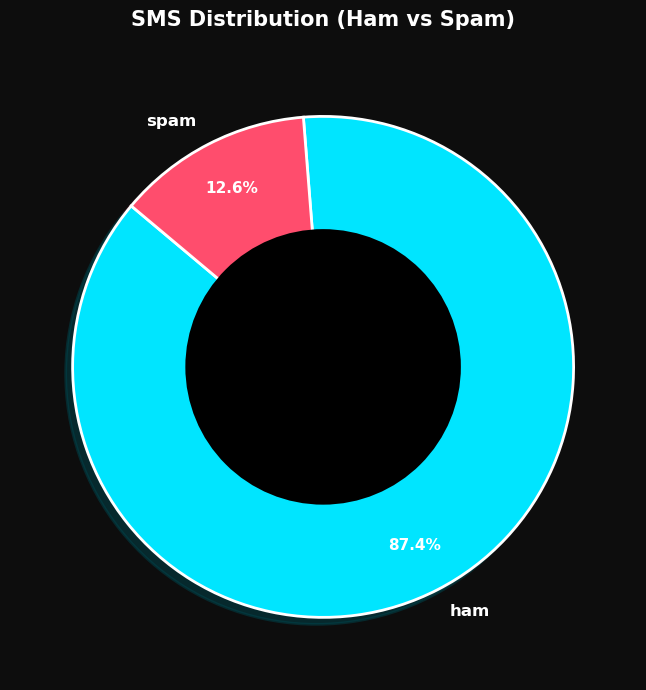

In [13]:
import matplotlib.pyplot as plt

# Count values
labels = df['Label'].value_counts().index
sizes = df['Label'].value_counts().values

# Create figure
plt.figure(figsize=(7, 7))

# Modern color palette
colors = ['#00E5FF', '#FF4D6D']  # neon cyan & neon pink

# Pie chart
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.8,
    wedgeprops={
        'edgecolor': 'white',
        'linewidth': 2,
        'antialiased': True
    },
    shadow=True
)

# Donut hole (futuristic look)
centre_circle = plt.Circle((0, 0), 0.55, fc='black')
plt.gca().add_artist(centre_circle)

# Text styling
for text in texts:
    text.set_fontsize(12)
    text.set_color('white')
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Title
plt.title(
    'SMS Distribution (Ham vs Spam)',
    fontsize=15,
    fontweight='bold',
    color='white',
    pad=20
)

# Dark futuristic background
plt.gca().set_facecolor('#0D0D0D')
plt.gcf().patch.set_facecolor('#0D0D0D')

plt.tight_layout()
plt.show()


In [14]:
df2 = pd.read_csv("emails.csv")
df2.head()

,Unnamed: 0,Label,Message,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [15]:
df2.shape

(5171, 4)

In [16]:
df2.drop("label_num" , axis = 1 , inplace = True)

In [17]:
df2 = df2.loc[:, ~df2.columns.str.contains("Unnamed")] # or u can do reset_index

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5171 non-null   object
 1   Message  5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [19]:
df2.duplicated().sum()

np.int64(178)

In [20]:
df2.drop_duplicates(inplace = True)

In [21]:
df2.isna().sum()

Label      0
Message    0
dtype: int64

In [22]:
df2["Label"].value_counts()

Label
ham     3531
spam    1462
Name: count, dtype: int64

In [23]:
final_data = pd.concat([df2, df], axis=0, ignore_index=True)
final_data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [24]:
final_data.shape

(10162, 2)

In [25]:
final_data.isnull().sum()

Label      0
Message    0
dtype: int64

In [26]:
final_data = final_data[['Label', 'Message']]

In [27]:
final_data.isna().sum()

Label      0
Message    0
dtype: int64

In [28]:
final_data

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
10157,spam,This is the 2nd time we have tried 2 contact u...
10158,ham,Will �_ b going to esplanade fr home?
10159,ham,"Pity, * was in mood for that. So...any other s..."
10160,ham,The guy did some bitching but I acted like i'd...


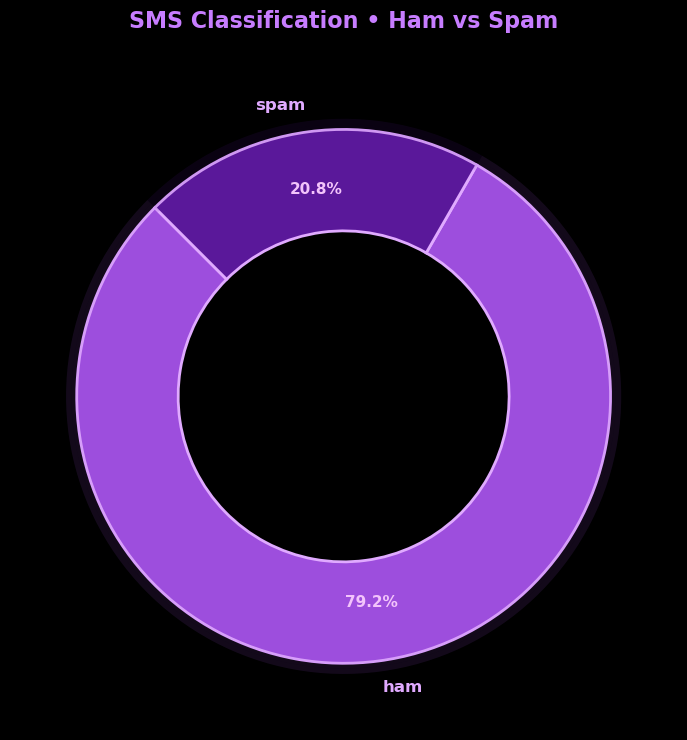

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = final_data['Label'].value_counts().index
sizes = final_data['Label'].value_counts().values

# Neon purple cyberpunk palette
colors = ['#9D4EDD', '#5A189A']  # neon violet & deep purple

# Figure
fig, ax = plt.subplots(figsize=(7.5, 7.5), facecolor='black')
ax.set_facecolor('black')

# Main pie (donut)
wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    colors=colors,
    startangle=135,
    autopct='%1.1f%%',
    pctdistance=0.78,
    wedgeprops=dict(
        width=0.38,
        edgecolor='#E0AAFF',
        linewidth=2
    )
)

# Neon glow effect (fake glow using extra rings)
for i in range(3):
    ax.pie(
        sizes,
        radius=1 + i * 0.02,
        colors=colors,
        startangle=135,
        wedgeprops=dict(
            width=0.02,
            edgecolor=None,
            alpha=0.12
        )
    )

# Center circle (deep black core)
centre_circle = plt.Circle((0, 0), 0.55, fc='black')
ax.add_artist(centre_circle)

# Text styling
for text in texts:
    text.set_color('#E0AAFF')
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_color('#F3C4FB')
    autotext.set_fontsize(11)
    autotext.set_fontweight('bold')

# Title
ax.set_title(
    'SMS Classification • Ham vs Spam',
    fontsize=16,
    fontweight='bold',
    color='#C77DFF',
    pad=25
)

plt.tight_layout()
plt.show()


In [30]:
final_data.to_csv('spamham.csv', index=False)

In [31]:
data = pd.read_csv('spamham.csv', encoding='latin-1', sep=',')
data.head()

,Label,Message
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [32]:
from collections import Counter
import nltk

count1 = Counter(" ".join(data[data['Label']=='ham']["Message"]).split()).most_common(20)
df1 = pd.DataFrame.from_dict(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(data[data['Label']=='spam']["Message"]).split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

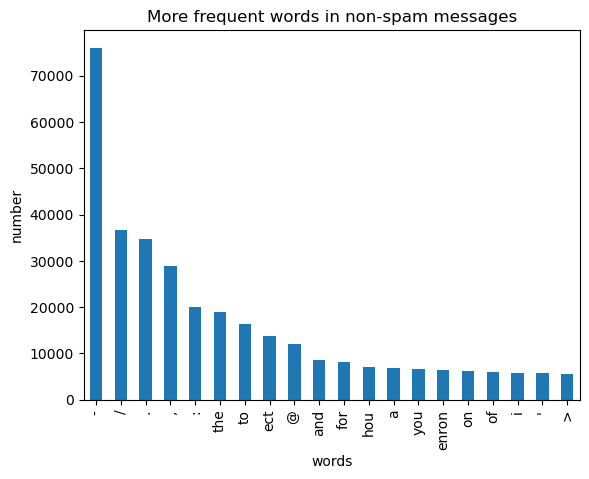

In [33]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

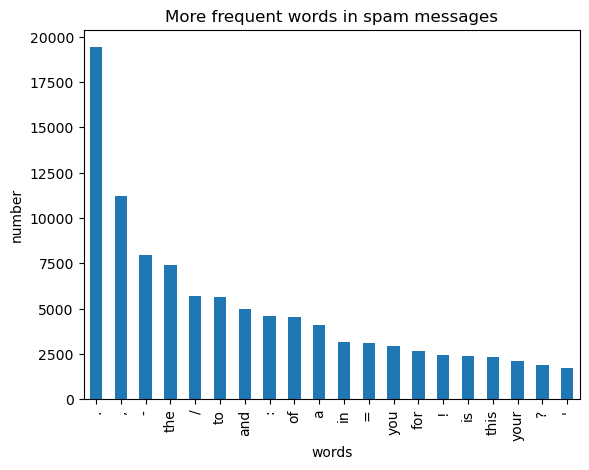

In [34]:
df2.plot.bar(legend = False)
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

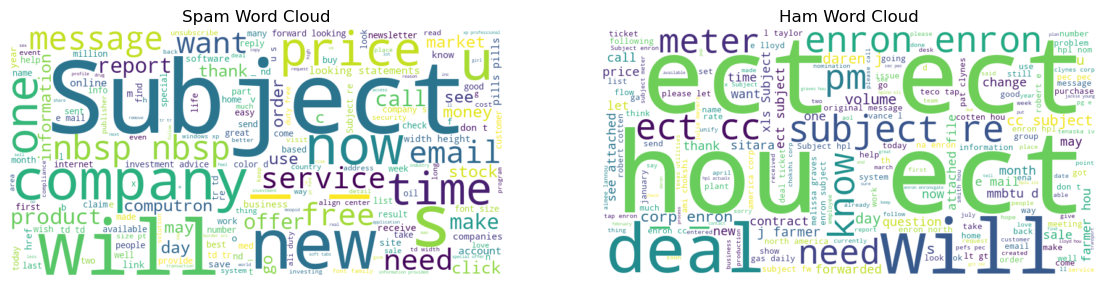

In [35]:
spam_text = " ".join(data[data['Label'] == 'spam']['Message'])
ham_text = " ".join(data[data['Label'] == 'ham']['Message'])

spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)

ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.title('Spam Word Cloud')
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Ham Word Cloud')
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

# Insight
Spam messages are dominated by promotional and urgency-driven words like free, new, call, now, time, indicating persuasive and action-oriented intent.

Ham (non-spam) messages mostly contain conversational and contextual words such as ok, deal, need, meeting,contract reflecting normal human communication.

Spam vocabulary is more repetitive and keyword-heavy, while ham messages show greater linguistic variety and natural flow.

This clear word-usage pattern makes text frequency a strong feature for spam classification models.

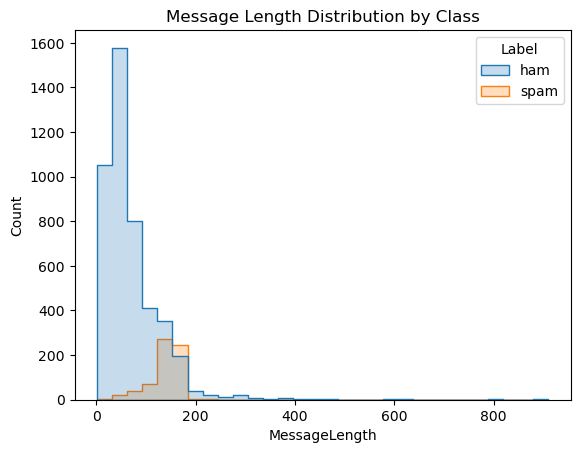

In [36]:
df['MessageLength'] = df['Message'].apply(len)
sns.histplot(data=df, x='MessageLength', hue='Label', element='step', bins=30)
plt.title('Message Length Distribution by Class')
plt.show()

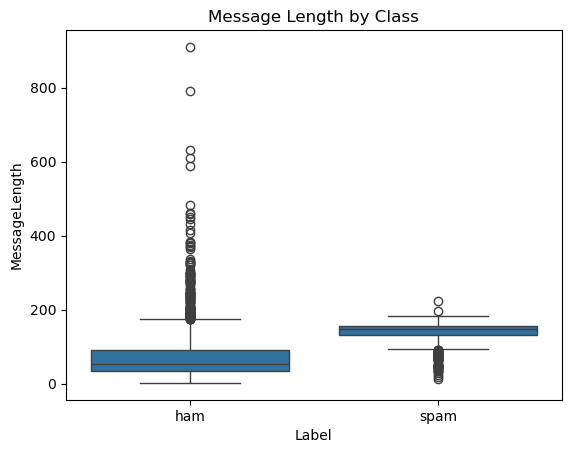

In [37]:
sns.boxplot(x='Label', y='MessageLength', data=df)
plt.title('Message Length by Class')
plt.show()

# Insights

Message Length Distribution: Spam messages tend to be longer on average than ham messages, while ham messages are mostly short with a long tail of a few very lengthy outliers.

Box Plot Insight: Spam messages show a higher median message length and a tighter spread, whereas ham messages exhibit more extreme outliers, indicating occasional very long personal or informational messages.

Overall conclusion: Message length is a useful distinguishing feature spam messages are generally longer and more consistent in length, while ham messages are shorter but more variable.

# Outlier Treatment
we don't need to do outlier treatment here because the data is

# Feature Extraction and Transformation

In [38]:
from nltk import word_tokenize
from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

data['Message'] = data['Message'].str.lower()
data['Message'] = data['Message'].str.replace(r'\W+', ' ')
data['Message'] = data['Message'].str.replace(r'\s+', ' ')
data['Message'] = data['Message'].str.strip()
data['Message'] = data['Message'].str.replace(r'\b\w\b', '')    
data['Message'] = data['Message'].str.replace(r'\b\w{1,2}\b', '')
data['Message'] = data['Message'].str.replace(r'\s+', ' ')  

In [39]:
data.head()

,Label,Message
0,ham,subject: enron methanol ; meter # : 988291\r\n...
1,ham,"subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"subject: photoshop , windows , office . cheap ..."
4,ham,subject: re : indian springs\r\nthis deal is t...


In [40]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\unsta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\unsta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [41]:
import nltk
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# downloads (run once)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    # cleaning
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # tokenization
    words = text.split()

    # stopword removal
    words = [w for w in words if w not in stop_words]

    # lemmatization with POS (VERB)
    words = [lemmatizer.lemmatize(w, pos=wordnet.VERB) for w in words]

    return ' '.join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\unsta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\unsta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\unsta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [42]:
msg = "This is a test message for running and studies!"
print(preprocess(msg))


test message run study


In [43]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))  # ✔ renamed
lemmatizer = WordNetLemmatizer()

def lemmatizing(message):
    message = message.split()
    message = [lemmatizer.lemmatize(word) 
               for word in message 
               if word not in stop_words]
    return ' '.join(message)

data["Message"] = data["Message"].apply(lemmatizing)
data.head()


,Label,Message
0,ham,subject: enron methanol ; meter # : 988291 fol...
1,ham,"subject: hpl nom january 9 , 2001 ( see attach..."
2,ham,"subject: neon retreat ho ho ho , ' around wond..."
3,spam,"subject: photoshop , window , office . cheap ...."
4,ham,subject: : indian spring deal book teco pvr re...


In [44]:
print(data['Message'][0].split())  # word_tokenize is used to split the sentence into words, it is a part of nltk library

['subject:', 'enron', 'methanol', ';', 'meter', '#', ':', '988291', 'follow', 'note', 'gave', 'monday', ',', '4', '/', '3', '/', '00', '{', 'preliminary', 'flow', 'data', 'provided', 'daren', '}', '.', 'please', 'override', 'pop', "'", 'daily', 'volume', '{', 'presently', 'zero', '}', 'reflect', 'daily', 'activity', 'obtain', 'gas', 'control', '.', 'change', 'needed', 'asap', 'economics', 'purpose', '.']


In [45]:
example.split()

NameError: name 'example' is not defined

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])
y = data['Label']

In [ ]:
print(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

y = label.fit_transform(y)  # LabelEncoder is used to convert the labels into numbers, 0 for ham and 1 for spam
y

## Checking data Imbalance and Handling the imbalance

In [ ]:
data["Label"].value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train_resampled.shape, y_train_resampled.shape

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nb_model = MultinomialNB(alpha=3)
nb_model.fit(X_train_resampled, y_train_resampled)

y_pred = nb_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=["Ham", "Spam"])
cm = confusion_matrix(y_test, y_pred)

print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)


# Conclusion

## Proper text preprocessing significantly improved feature quality and model performance.

## Lemmatization proved more meaningful than stemming for text normalization.

## SMOTE effectively handled class imbalance, improving the model’s ability to detect spam messages.

## Multinomial Naive Bayes performed well for this task due to its suitability for count-based text features.

## Evaluation using precision, recall, and F1-score provided a more reliable assessment than accuracy alone.

## The final model achieved a strong balance between performance and interpretability, making it suitable for real-world spam detection scenarios.